### CONTOURS

2
424
144


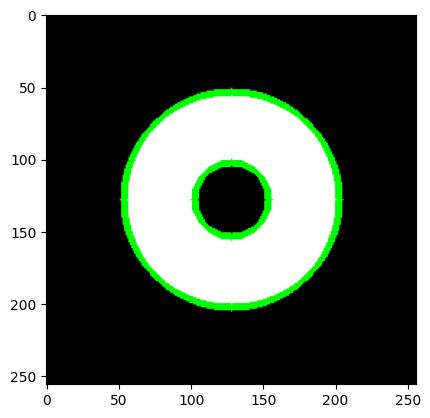

In [1]:
# Importing libraries.
import cv2
import matplotlib.pyplot as plt

# Reading and converting.
img = cv2.imread("media/circle.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Optional, thresholding,
# ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(len(contours))
print(len(contours[0]))
print(len(contours[1]))

cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.imshow(img, cmap='gray')

coins in the image :  4


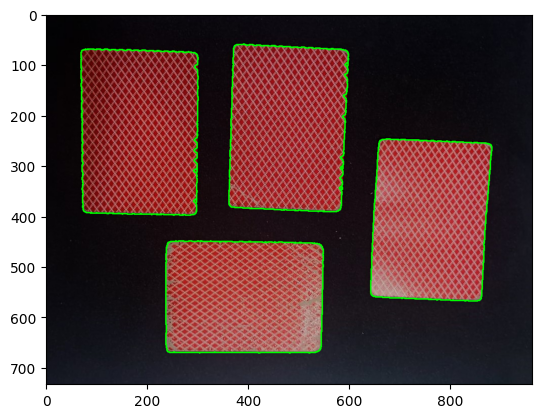

In [7]:
# Import libraries 
import cv2 
import matplotlib.pyplot as plt 


# image = cv2.imread('media/coins_separated.jpg') 
image = cv2.imread('media/cards.jpg') 
image = image[:,10:,:]

# image = cv2.imread('media/coins_separated.jpg') 
# image = cv2.imread('media/cards.jpg')
# image = cv2.imread('media/hand.png') 
# image = cv2.imread('media/stars.png') 
# image = cv2.imread('media/black_stars.png') 


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# plt.imshow(gray, cmap="gray")
# plt.figure()

blur = cv2.GaussianBlur(gray, (11, 11), 0) 
canny = cv2.Canny(blur, 30, 150, 30) 

# plt.imshow(canny, cmap="gray")
# plt.figure()

dilated = cv2.dilate(canny, (1, 1), iterations=0) 
dilated = cv2.dilate(canny, (1, 1), iterations=2)


# plt.imshow(dilated, cmap="gray")
# plt.figure()

# Multiple points stored or just the edges.
(cnt, hierarchy) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# (cnt, hierarchy) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# print(len(cnt[3]))

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2) 

print("coins in the image : ", len(cnt)) 

plt.imshow(rgb)


coins in the image :  3


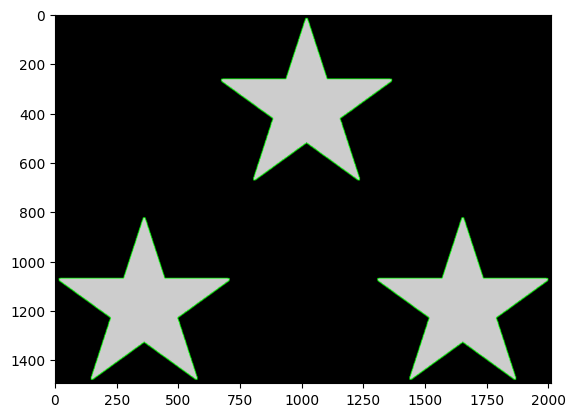

In [3]:
# Import libraries 
import cv2 
import matplotlib.pyplot as plt 

# image = cv2.imread('media/coins_separated.jpg') 
image = cv2.imread('media/cards.jpg') 

# image = cv2.imread('media/coins_separated.jpg') 
# image = cv2.imread('media/cards.jpg')
# image = cv2.imread('media/hand.png') 
image = cv2.imread('media/stars.png') 
# image = cv2.imread('media/black_stars.png') 

# image = image[:,10:,:]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# plt.imshow(gray, cmap="gray")
# plt.figure()

blur = cv2.GaussianBlur(gray, (11, 11), 0) 
canny = cv2.Canny(blur, 30, 150, 30) 

# plt.imshow(canny, cmap="gray")
# plt.figure()

dilated = cv2.dilate(canny, (1, 1), iterations=0) 
dilated = cv2.dilate(canny, (1, 1), iterations=2)


# plt.imshow(dilated, cmap="gray")
# plt.figure()

# Multiple points stored or just the edges.
(cnt, hierarchy) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# (cnt, hierarchy) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

# print(len(cnt[3]))

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2) 

print("coins in the image : ", len(cnt)) 

plt.imshow(rgb)


#### Detecting multiple cylinders

##### Try with contour first

In [5]:
import cv2 
import numpy as np

cap = cv2.VideoCapture("media/Conveyor Belt Inclined.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
# print(fps)

w_f = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h_f = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

x_f= w_f // 2
y_f = h_f // 2

x = 0
w = w_f
y = h_f // 2
h = h_f // 4

try:
    while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (x_f,y_f))

        # No more frames captured. Exiting.
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
        blur = cv2.GaussianBlur(gray, (11, 11), 10) 

        canny = cv2.Canny(blur, 30, 150, 30) 
        dilated = cv2.dilate(canny, (1, 1), iterations=3)
        
        (cnt, hierarchy) = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        cv2.drawContours(frame, cnt, -1, (0, 255, 0), 2) 

        cv2.imshow("Frame", frame)
        cv2.imshow("Gray", gray)
        cv2.imshow("VideoCapture", dilated)



        # k = cv2.waitKey(int(1000/(1 * fps)))
        k = cv2.waitKey(0)

        if k == ord('q'):
            break

except Exception as error:
    print("SOME ERROR: ")
    print(error)

finally:
    cap.release()
    cv2.destroyAllWindows()

##### Separating colors and detecting contours (Count)

In [6]:
import cv2 
import numpy as np

cap = cv2.VideoCapture("media/Conveyor Belt Top Lights.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
# print(fps)

w_f = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h_f = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

x_f= w_f // 2
y_f = h_f // 2

x = 0
w = w_f
y = h_f // 2
h = h_f // 4

color_ranges = {
    'red': ([0, 120, 70], [10, 255, 255]),     # Red
    'green': ([36, 25, 25], [70, 255, 255]),   # Green
    'blue': ([94, 80, 2], [126, 255, 255])     # Blue
}

color_info = {
    'red': ((50,50), (0,0,0)),     # Red
    'green': ((50,100), (0,0,0)),   # Green
    'blue': ((50,150), (0,0,0))     # Blue
}


def filter_contours_by_area(contours, min_area, max_area):
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        print(area)
        if min_area < area < max_area:
            filtered_contours.append(contour)
    return filtered_contours


try:
    while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (x_f,y_f))

        # No more frames captured. Exiting.
        if not ret:
            break

        # Changing to HSV to work with color values and saturation.
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        for color_name, (lower, upper) in color_ranges.items():
            # Mask definition per color.
            lower = np.array(lower)
            upper = np.array(upper)
            mask = cv2.inRange(hsv, lower, upper)

            # Gaussian and Canny.
            mask_blur = cv2.GaussianBlur(mask, (11, 11), 10)
            canny = cv2.Canny(mask_blur, 30, 150)
            
            # Manipulation of edges.
            kernel = np.ones((5,5), dtype=np.uint8)
            
            dilated = cv2.dilate(canny, (1, 1), iterations=10)
            closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

            # Finding contours.
            cnts, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = filter_contours_by_area(cnts, min_area=100, max_area=10000)
            cv2.drawContours(frame, cnts, -1, (0, 255, 0), 2)
            
            # Showing the mask for each color.
            cv2.imshow(f"{color_name} mask", dilated)

            cv2.putText(frame, 
                        text=f"Color: {color_name} - Counts: {len(cnts)}", 
                        org=color_info[color_name][0], 
                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                        fontScale=0.8, 
                        color=color_info[color_name][1])

        cv2.imshow("Frame", frame)


        k = cv2.waitKey(int(1000/(1 * fps)))
        # k = cv2.waitKey(0)

        if k == ord('q'):
            break

except Exception as error:
    print("SOME ERROR: ")
    print(error)

finally:
    cap.release()
    cv2.destroyAllWindows()

0.0
425.0
764.0
1131.0
1476.5
6264.0
6325.5
6278.0
6207.0
6147.0
6128.0
6020.5
5921.5
5907.5
5844.0
5735.0
5717.0
5624.5
5609.5
5526.0
5410.5
5384.5
5323.0
5307.0
5305.5
5319.5
5291.0
5318.0
5385.0
5438.0
5495.0
5613.5
558.0
5667.5
1141.0
5755.5
1708.5
5833.0
6427.5
5935.0
6380.0
6038.5
6284.5
6100.5
6089.5
6123.5
6023.5
6221.0
5993.5
6348.5
5934.0
1685.5
5843.0
1064.5
5758.5
472.5
5695.0
5643.0
5565.0
666.0
5493.5
1304.0
5443.0
6225.5
5375.0
6197.0
5410.0
6126.0
5510.0
6037.0
5532.5
5957.0
5664.5
5859.0
5749.0
5757.0
5792.5
5687.0
5800.0
5544.5
539.0
5902.0
5473.5
1898.5
6042.5
5406.0
2116.5
6204.0
5328.0
5793.0
6279.5
5267.5
5788.5
6357.5
5228.0
5724.5
6433.5
5227.0
5479.0
1775.5
5245.5
5381.5
1069.0
5303.5
5307.0
418.0
5389.5
5263.0
5503.0
443.0
5180.0
5584.5
1120.0
5094.5
5671.0
1799.5
4939.5
5801.5
6253.5
4894.0
5903.5
6186.0
4830.5
6003.0
6097.5
4824.5
6108.5
5987.0
4827.0
42.0
6211.0
5882.5
4928.0
849.5
6235.0
5767.0
4888.0
1520.0
1732.0
5678.5
4930.0
6388.5
1002.5
5588.5
5050.5